In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 

from sklearn.model_selection import train_test_split, KFold, cross_val_score

#regression models
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm, metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import scipy.stats as stats

#neural networks?? 
from keras.models import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv('mydramalist.csv')

In [4]:
df.head()

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis,url
0,Tunnel,Drama,South Korea,16,2017,OCN,60 min.,"32,651","Nam Ki Hoon, Shin Yong Hwi",Lee Eun Mi,8.7,"14,787","Choi Jin Hyuk,Yoon Hyun Min,Lee Yoo Young,Jo H...","Thriller,Mystery,Sci-Fi,Fantasy","Time Travel,Murder,Criminal Profiler,Serial K...","In 1986, Park Gwang Ho works as an excellent a...",https://i.mydramalist.com/JkryYc.jpg?v=1
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1 hr. 13 min.,"16,043",Jung Ji Hyun,Kwon Do Eun,8.8,"2,119","Kim Tae Ri,Nam Joo Hyuk,Bona,Choi Hyun Wook,Le...","Romance,Life,Youth,Drama","Athlete,Fencing,1990s,Coming Of Age,Bold Fema...",The story is set in 1998 and tells the stories...,https://i.mydramalist.com/ROOPo_4c.jpg?v=1
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1 hr. 10 min.,"31,855","Yoo In Shik, Lee Gil Bok",Kang Eun Kyung,8.7,"15,880","Han Seok Kyu,Ahn Hyo Seop,Lee Sung Kyung,Kim J...","Romance,Drama,Medical,Melodrama","Hospital,Smart Male Lead,Character Developmen...","A 혫real doctor혬 story set in a small, humble h...",https://i.mydramalist.com/Rr7DEc.jpg?v=1
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,52 min.,"40,962",Kim Sung Ho,Yoon Ji Ryun,9.2,"20,399","Lee Je Hoon,Tang Jun Sang,Hong Seung Hee,Jung ...","Life,Drama,Family","Autism,Uncle-Nephew Relationship,Death,Savant...",Geu Roo is a young autistic man. He works for ...,https://i.mydramalist.com/Rle36_4c.jpg?v=1
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1 hr. 25 min.,"1,10,352",Lee Jeong Hyo,Park Ji Eun,9.0,"62,174","Hyun Bin,Son Ye Jin,Seo Ji Hye,Kim Jung Hyun,Y...","Military,Comedy,Romance,Political","North And South Korea,Star Crossed Lovers,Str...","After getting into a paragliding accident, Sou...",https://i.mydramalist.com/XrN2dc.jpg?v=1


# Cleaning numerical column data - removing n/a

In [5]:
df.drop('url',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             3577 non-null   object 
 1   category         3577 non-null   object 
 2   country          3577 non-null   object 
 3   num_episodes     3577 non-null   int64  
 4   aired            3577 non-null   int64  
 5   orginal_network  3438 non-null   object 
 6   duration         3517 non-null   object 
 7   watchers         3577 non-null   object 
 8   director         3577 non-null   object 
 9   screenwriter     2561 non-null   object 
 10  rating           3577 non-null   float64
 11  num_raters       3577 non-null   object 
 12  cast_names       3577 non-null   object 
 13  genre_names      3564 non-null   object 
 14  tag_names        3577 non-null   object 
 15  synopsis         3538 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 447.2+ KB


In [7]:
#turning watchers/num_raters columns from object to integer
df['watchers']=df['watchers'].str.replace(',','')
df['watchers'] = df['watchers'].astype(str).astype(int)

In [8]:
df['num_raters']=df['num_raters'].str.replace(',','')
df['num_raters'] = df['num_raters'].replace(['1 user '],'1')

In [9]:
df['num_raters'] = df['num_raters'].astype(str).astype(int)

In [10]:
df.describe()

,num_episodes,aired,watchers,rating,num_raters
count,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000
mean,26.050042,2015.627062,7787.430249,7.809785,3452.841208
std,35.420809,5.012415,14257.104960,0.462116,7315.262677
min,1.000000,2000.000000,5.000000,6.100000,1.000000
25%,10.000000,2013.000000,1104.000000,7.500000,362.000000
50%,16.000000,2017.000000,2791.000000,7.900000,929.000000
75%,31.000000,2020.000000,7808.000000,8.100000,2978.000000
max,682.000000,2022.000000,156368.000000,9.200000,83106.000000


In [11]:
df.aired.astype('int32')
pd.to_datetime(df.aired, format = '%Y')

0      2017-01-01
1      2022-01-01
2      2020-01-01
3      2021-01-01
4      2020-01-01
          ...    
3572   2015-01-01
3573   2010-01-01
3574   2011-01-01
3575   2016-01-01
3576   2019-01-01
Name: aired, Length: 3577, dtype: datetime64[ns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             3577 non-null   object 
 1   category         3577 non-null   object 
 2   country          3577 non-null   object 
 3   num_episodes     3577 non-null   int64  
 4   aired            3577 non-null   int64  
 5   orginal_network  3438 non-null   object 
 6   duration         3517 non-null   object 
 7   watchers         3577 non-null   int32  
 8   director         3577 non-null   object 
 9   screenwriter     2561 non-null   object 
 10  rating           3577 non-null   float64
 11  num_raters       3577 non-null   int32  
 12  cast_names       3577 non-null   object 
 13  genre_names      3564 non-null   object 
 14  tag_names        3577 non-null   object 
 15  synopsis         3538 non-null   object 
dtypes: float64(1), int32(2), int64(2), object(11)
memory usage: 

In [13]:
#Is raters or watchers a more viable variable? 
watchers_count = len([i for i in df['watchers'] if i > 500])
print ("Watchers greater than 500 : " + str(watchers_count))

Watchers greater than 500 : 3008


In [14]:
#eliminate the entries with less than x raters? 
raters_count = len([i for i in df['num_raters'] if i > 200])
print ("Raters greater than 200 : " + str(raters_count))

Raters greater than 200 : 2927


In [15]:
raters = df['num_raters'] >= 200
raters.value_counts()

True     2927
False     650
Name: num_raters, dtype: int64

In [16]:
# dropping low rate count dramas
df2= df.drop(df.loc[df['num_raters']<=200].index)

In [17]:
# drop null values in genre list
df2 = df2[df2['genre_names'].notna()]
df2 = df2[df2['duration'].notna()]
df2 = df2[df2['screenwriter'].notna()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 3546
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2211 non-null   object 
 1   category         2211 non-null   object 
 2   country          2211 non-null   object 
 3   num_episodes     2211 non-null   int64  
 4   aired            2211 non-null   int64  
 5   orginal_network  2182 non-null   object 
 6   duration         2211 non-null   object 
 7   watchers         2211 non-null   int32  
 8   director         2211 non-null   object 
 9   screenwriter     2211 non-null   object 
 10  rating           2211 non-null   float64
 11  num_raters       2211 non-null   int32  
 12  cast_names       2211 non-null   object 
 13  genre_names      2211 non-null   object 
 14  tag_names        2211 non-null   object 
 15  synopsis         2211 non-null   object 
dtypes: float64(1), int32(2), int64(2), object(11)
memory usage: 

In [18]:
# remove dramas with only 1 episode. wouldnt this be a movie? 
episodes = df2['num_episodes'] > 1
episodes.value_counts()

True     2210
False       1
Name: num_episodes, dtype: int64

In [19]:
df2['duration']

0             60 min.
1       1 hr. 13 min.
2       1 hr. 10 min.
3             52 min.
4       1 hr. 25 min.
            ...      
3480          24 min.
3511          25 min.
3533          48 min.
3538          24 min.
3546          50 min.
Name: duration, Length: 2211, dtype: object

In [20]:
#convert duration column to time data
df2['duration']= df2['duration'].str.replace('60 min.','1 hr. 00 min.')

In [21]:
import datetime as dt

def transform(t):
    if 'hr.' in t:
        return dt.datetime.strptime(t, '%I hr. %M min.').strftime('%I:%M')
    return dt.datetime.strptime(t, '%M min.').strftime('00:%M')

df2['duration'] = df2['duration'].apply(lambda x: transform(x))
df2.head()

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis
0,Tunnel,Drama,South Korea,16,2017,OCN,01:00,32651,"Nam Ki Hoon, Shin Yong Hwi",Lee Eun Mi,8.7,14787,"Choi Jin Hyuk,Yoon Hyun Min,Lee Yoo Young,Jo H...","Thriller,Mystery,Sci-Fi,Fantasy","Time Travel,Murder,Criminal Profiler,Serial K...","In 1986, Park Gwang Ho works as an excellent a..."
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,01:13,16043,Jung Ji Hyun,Kwon Do Eun,8.8,2119,"Kim Tae Ri,Nam Joo Hyuk,Bona,Choi Hyun Wook,Le...","Romance,Life,Youth,Drama","Athlete,Fencing,1990s,Coming Of Age,Bold Fema...",The story is set in 1998 and tells the stories...
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,01:10,31855,"Yoo In Shik, Lee Gil Bok",Kang Eun Kyung,8.7,15880,"Han Seok Kyu,Ahn Hyo Seop,Lee Sung Kyung,Kim J...","Romance,Drama,Medical,Melodrama","Hospital,Smart Male Lead,Character Developmen...","A 혫real doctor혬 story set in a small, humble h..."
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,00:52,40962,Kim Sung Ho,Yoon Ji Ryun,9.2,20399,"Lee Je Hoon,Tang Jun Sang,Hong Seung Hee,Jung ...","Life,Drama,Family","Autism,Uncle-Nephew Relationship,Death,Savant...",Geu Roo is a young autistic man. He works for ...
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,01:25,110352,Lee Jeong Hyo,Park Ji Eun,9.0,62174,"Hyun Bin,Son Ye Jin,Seo Ji Hye,Kim Jung Hyun,Y...","Military,Comedy,Romance,Political","North And South Korea,Star Crossed Lovers,Str...","After getting into a paragliding accident, Sou..."


In [22]:
import datetime as dt
start_dt = dt.datetime.strptime("00:00", '%H:%M')
df2['duration'] = [float('{:0.3f}'.format((dt.datetime.strptime(time, '%H:%M') - start_dt).seconds/3600)) for time in df2['duration']]

# cleaning categorical column data

In [23]:
#DIRECTOR turn director column into string, split multiple directors. 
# shoul I only take the first name listed? 
#df2['director'] = df2.director.apply(lambda x: x.split(',')[0] if ',' in x else x)
#dir into a diff format? like cast? 
df2['director'] = df2['director'].str.split(',')

In [24]:
#Make a new column for main genre to test using only first listed drama
df2['genre_names']= df2['genre_names'].str.replace(' ','')
df2['main_genre'] = df2['genre_names'].str.split(',').str[0]

In [25]:
#take only top 3 listed genres
df2['genre_names'] = df2['genre_names'].str.split(',').str[:2]

In [26]:
#using only top 4 listed tags
df2['tag_names'] = df2['tag_names'].str.split(',').str[:3]

In [27]:
# taking the first 4 listed cast names
df2['cast_names'] = df2['cast_names'].str.split(',')
#first 3 listed cast names? 
#df2['cast_names'] = df2['cast_names'].str[:3]

In [28]:
# screenwriter as well
df2['screenwriter'] = df2['screenwriter'].str.split(',')


In [29]:
df2.head()

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis,main_genre
0,Tunnel,Drama,South Korea,16,2017,OCN,1.000,32651,"[Nam Ki Hoon, Shin Yong Hwi]",[Lee Eun Mi],8.7,14787,"[Choi Jin Hyuk, Yoon Hyun Min, Lee Yoo Young, ...","[Thriller, Mystery]","[ Time Travel, Murder, Criminal Profiler]","In 1986, Park Gwang Ho works as an excellent a...",Thriller
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1.217,16043,[Jung Ji Hyun],[Kwon Do Eun],8.8,2119,"[Kim Tae Ri, Nam Joo Hyuk, Bona, Choi Hyun Woo...","[Romance, Life]","[ Athlete, Fencing, 1990s]",The story is set in 1998 and tells the stories...,Romance
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],8.7,15880,"[Han Seok Kyu, Ahn Hyo Seop, Lee Sung Kyung, K...","[Romance, Drama]","[ Hospital, Smart Male Lead, Character Develop...","A 혫real doctor혬 story set in a small, humble h...",Romance
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],9.2,20399,"[Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, J...","[Life, Drama]","[ Autism, Uncle-Nephew Relationship, Death]",Geu Roo is a young autistic man. He works for ...,Life
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],9.0,62174,"[Hyun Bin, Son Ye Jin, Seo Ji Hye, Kim Jung Hy...","[Military, Comedy]","[ North And South Korea, Star Crossed Lovers, ...","After getting into a paragliding accident, Sou...",Military


In [30]:
df2['main_genre'].value_counts()
df2.main_genre.unique()

array(['Thriller', 'Romance', 'Life', 'Military', 'Action', 'Mystery',
       'Historical', 'Friendship', 'Adventure', 'Psychological', 'Comedy',
       'Business', 'Horror', 'Food', 'Drama', 'Music', 'Youth', 'Law',
       'Crime', 'School', 'Tokusatsu', 'Family', 'Medical', 'Sci-Fi'],
      dtype=object)

Making new df with dramas with rating over 8.5

In [31]:
dftoprated = df2.loc[(df2['rating'] >= 8.5)]

In [32]:
dftoprated= dftoprated.sort_values(by="rating",ascending=False)

In [33]:
dftoprated

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis,main_genre
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],9.2,20399,"[Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, J...","[Life, Drama]","[ Autism, Uncle-Nephew Relationship, Death]",Geu Roo is a young autistic man. He works for ...,Life
34,Nirvana in Fire,Drama,China,54,2015,BTV,0.750,19375,"[Kong Sheng, Li Xue]",[Hai Yan],9.1,6692,"[Hu Ge, Liu Tao, Wang Kai, Chen Long, Victor H...","[Historical, Wuxia]","[ Smart Male Lead, Power Struggle, Tragic Past]","In sixth-century China, Emperor Xiaoxuan of So...",Historical
48,The Untamed,Drama,China,50,2019,Tencent Video,0.750,61954,"[Steve Cheng, Chan Ka Lam]","[Deng Yao Yu, Yang Xia, Guo Guang Yun, J...",9.1,30974,"[Xiao Zhan, Wang Yi Bo, Wang Zhuo Cheng, Xuan ...","[Historical, Mystery]","[ Adapted From A Novel, Playful Male Lead, Cen...","Wei Wu Xian and Lan Wang Ji, two talented disc...",Historical
69,Prison Playbook,Drama,South Korea,16,2018,Netflix tvN,1.533,52804,[Shin Won Ho],"[Jung Bo Hoon, Lee Woo Jung]",9.1,19710,"[Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im...","[Comedy, Crime]","[ Prison, Bromance, Wrongfully Accused]","Kim Je Hyuk, a famous baseball player, is arre...",Comedy
62,My Mister,Drama,South Korea,16,2018,tvN,1.283,48130,"[Kim Won Suk, Kim Sang Woo]",[Park Hae Young],9.1,18336,"[Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk,...","[Psychological, Life]","[ Age Gap, Nice Male Lead, Strong Female Lead]",Park Dong Hoon is a middle-aged engineer who i...,Psychological
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,Kairos,Drama,South Korea,16,2020,MBC,1.167,13499,[Park Seung Woo],[Lee Soo Hyun],8.5,4339,"[Shin Sung Rok, Lee Se Young, Ahn Bo Hyun, Nam...","[Action, Thriller]","[ Time Altering, Past And Present, Hardworking...",Living a precarious life as a part-timer at a ...,Action
126,Fight For My Way,Drama,South Korea,16,2017,KBS2,1.000,90231,"[Lee Na Jung, Kim Dong Hwi]",[Im Sang Choon],8.5,46113,"[Park Seo Joon, Kim Ji Won, Ahn Jae Hong, Song...","[Business, Comedy]","[ Childhood Friends, Friends To Lovers, Strong...",Can you still go after your dreams without the...,Business
165,Skate Into Love,Drama,China,40,2020,LINE TV Youku,0.750,22972,[Chu Yui Bun],[Ma Jia],8.5,10317,"[Zhang Xin Cheng, Janice Wu, Zhou Zhan, Vincen...","[Comedy, Romance]","[ Sassy Female Lead, Childhood Friends, Love/H...",A shorttrack speed skating girl crosses paths ...,Comedy
173,"Hi Bye, Mama!",Drama,South Korea,16,2020,Netflix tvN,1.167,28064,[Yoo Je Won],[Kwon Hye Joo],8.5,12840,"[Kim Tae Hee, Lee Kyu Hyung, Go Bo Gyeol, Seo ...","[Romance, Family]","[ Married Couple, Mother-Daughter Relationship...",It's the story of a mother who died and begins...,Romance


# Transferring genres into dummy variables

In [34]:
#which one shows better results? main_genres or genre_names ?
df_genres = pd.Series(df2['genre_names'])
df_genres = pd.get_dummies(df_genres.apply(pd.Series).stack()).sum(level=0)
# Turns genres into dummy variables
df_genres

,Action,Adventure,Business,Comedy,Crime,Drama,Family,Fantasy,Food,Friendship,...,Psychological,Romance,School,Sci-Fi,Sports,Supernatural,Thriller,Tokusatsu,Wuxia,Youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3511,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3533,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3538,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_genres_added = pd.concat([df2, df_genres], axis=1)
df_genres_added

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,...,Psychological,Romance,School,Sci-Fi,Sports,Supernatural,Thriller,Tokusatsu,Wuxia,Youth
0,Tunnel,Drama,South Korea,16,2017,OCN,1.000,32651,"[Nam Ki Hoon, Shin Yong Hwi]",[Lee Eun Mi],...,0,0,0,0,0,0,1,0,0,0
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1.217,16043,[Jung Ji Hyun],[Kwon Do Eun],...,0,1,0,0,0,0,0,0,0,0
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],...,0,1,0,0,0,0,0,0,0,0
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],...,0,0,0,0,0,0,0,0,0,0
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,Hikonin Sentai Akibaranger,Drama,Japan,13,2012,TV Asahi,0.400,980,"[Tasaki Ryuta, Suzumura Nobuhiro]","[Komura Junko, Arakawa Naruhisa]",...,0,0,0,0,0,0,0,1,0,0
3511,Garo: Makai Senki,Drama,Japan,24,2012,TV Tokyo,0.417,727,[Amemiya Keita],"[Kobayashi Yasuko, Era Itaru]",...,0,0,0,0,0,0,0,1,0,0
3533,My Ride,Drama,Thailand,10,2022,GMM 25,0.800,7006,[Por Saroch Nuamsamran],"[Fluke Teerapat Lohanan, Tanachot Prapasri]",...,0,1,0,0,0,0,0,0,0,0
3538,Yuru Camp?,Drama,Japan,12,2020,TV Tokyo,0.400,849,"[Ninomiya Takashi, Yoshino Mamoru, Tamazaw...",[Kitagawa Ayako],...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_genres_added.drop(['category'], inplace=True, axis=1)
df_genres_added.set_index('Name',inplace=True)

In [37]:
list(df_genres_added.columns)

['country',
 'num_episodes',
 'aired',
 'orginal_network',
 'duration',
 'watchers',
 'director',
 'screenwriter',
 'rating',
 'num_raters',
 'cast_names',
 'genre_names',
 'tag_names',
 'synopsis',
 'main_genre',
 'Action',
 'Adventure',
 'Business',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Food',
 'Friendship',
 'Historical',
 'Horror',
 'Law',
 'Life',
 'Mature',
 'Medical',
 'Melodrama',
 'Military',
 'Music',
 'Mystery',
 'Political',
 'Psychological',
 'Romance',
 'School',
 'Sci-Fi',
 'Sports',
 'Supernatural',
 'Thriller',
 'Tokusatsu',
 'Wuxia',
 'Youth']

In [38]:
df_genres_added=df_genres_added.drop('genre_names', axis=1)

In [39]:
df_genres_added= df_genres_added.drop(['country', 'num_episodes', 'aired', 'orginal_network', 'duration',
       'watchers', 'director', 'screenwriter', 'rating', 'num_raters',
       'cast_names', 'tag_names', 'synopsis','main_genre'], axis=1)

In [40]:
df_genres_added

,Action,Adventure,Business,Comedy,Crime,Drama,Family,Fantasy,Food,Friendship,...,Psychological,Romance,School,Sci-Fi,Sports,Supernatural,Thriller,Tokusatsu,Wuxia,Youth
Name,,,,,,,,,,,,,,,,,,,,,
Tunnel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Twenty-Five Twenty-One,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Dr. Romantic 2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Move to Heaven,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Crash Landing on You,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hikonin Sentai Akibaranger,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Garo: Makai Senki,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
My Ride,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [41]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 3546
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Action         2211 non-null   uint8
 1   Adventure      2211 non-null   uint8
 2   Business       2211 non-null   uint8
 3   Comedy         2211 non-null   uint8
 4   Crime          2211 non-null   uint8
 5   Drama          2211 non-null   uint8
 6   Family         2211 non-null   uint8
 7   Fantasy        2211 non-null   uint8
 8   Food           2211 non-null   uint8
 9   Friendship     2211 non-null   uint8
 10  Historical     2211 non-null   uint8
 11  Horror         2211 non-null   uint8
 12  Law            2211 non-null   uint8
 13  Life           2211 non-null   uint8
 14  Mature         2211 non-null   uint8
 15  Medical        2211 non-null   uint8
 16  Melodrama      2211 non-null   uint8
 17  Military       2211 non-null   uint8
 18  Music          2211 non-null   uint8
 19  Myster

In [42]:
df2

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis,main_genre
0,Tunnel,Drama,South Korea,16,2017,OCN,1.000,32651,"[Nam Ki Hoon, Shin Yong Hwi]",[Lee Eun Mi],8.7,14787,"[Choi Jin Hyuk, Yoon Hyun Min, Lee Yoo Young, ...","[Thriller, Mystery]","[ Time Travel, Murder, Criminal Profiler]","In 1986, Park Gwang Ho works as an excellent a...",Thriller
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1.217,16043,[Jung Ji Hyun],[Kwon Do Eun],8.8,2119,"[Kim Tae Ri, Nam Joo Hyuk, Bona, Choi Hyun Woo...","[Romance, Life]","[ Athlete, Fencing, 1990s]",The story is set in 1998 and tells the stories...,Romance
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],8.7,15880,"[Han Seok Kyu, Ahn Hyo Seop, Lee Sung Kyung, K...","[Romance, Drama]","[ Hospital, Smart Male Lead, Character Develop...","A 혫real doctor혬 story set in a small, humble h...",Romance
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],9.2,20399,"[Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, J...","[Life, Drama]","[ Autism, Uncle-Nephew Relationship, Death]",Geu Roo is a young autistic man. He works for ...,Life
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],9.0,62174,"[Hyun Bin, Son Ye Jin, Seo Ji Hye, Kim Jung Hy...","[Military, Comedy]","[ North And South Korea, Star Crossed Lovers, ...","After getting into a paragliding accident, Sou...",Military
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,Hikonin Sentai Akibaranger,Drama,Japan,13,2012,TV Asahi,0.400,980,"[Tasaki Ryuta, Suzumura Nobuhiro]","[Komura Junko, Arakawa Naruhisa]",7.9,353,"[Wada Masato, Ogino Karin, Hinami Kyoko, Takag...","[Tokusatsu, Comedy]","[ Parody, Otaku, Super Sentai]",This unofficial 36.1st installment in the long...,Tokusatsu
3511,Garo: Makai Senki,Drama,Japan,24,2012,TV Tokyo,0.417,727,[Amemiya Keita],"[Kobayashi Yasuko, Era Itaru]",7.9,330,"[Fujita Rei, Kageyama Hironobu, Konishi Ryosei...","[Action, Tokusatsu]","[ Superhero, Sword-fight, Nudity]",Garo: Makai Senki is a Japanese tokusatsu tele...,Action
3533,My Ride,Drama,Thailand,10,2022,GMM 25,0.800,7006,[Por Saroch Nuamsamran],"[Fluke Teerapat Lohanan, Tanachot Prapasri]",7.9,236,"[Fame Chawinroj Likitchareonsakul, Fluke Pongs...","[Comedy, Romance]","[ Friends To Lovers, Doctor Male Lead, Taxi Dr...","This is the story of Mork and Tawan, a motorcy...",Comedy
3538,Yuru Camp?,Drama,Japan,12,2020,TV Tokyo,0.400,849,"[Ninomiya Takashi, Yoshino Mamoru, Tamazaw...",[Kitagawa Ayako],7.9,223,"[Fukuhara Haruka, Ohara Yuno, Tanabe Momoko, Y...","[Adventure, Friendship]","[ Adapted From A Manga, Hobbies, Classmate]",This is the story of a winter day. Kagamihara ...,Adventure


In [43]:
genres_count = pd.DataFrame(df_genres_added.sum(axis=0))
genres_count = genres_count.rename(columns={0:'Count'})

<Axes: >

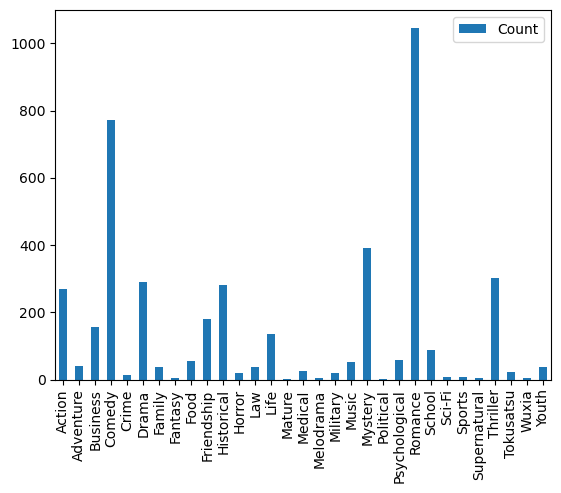

In [44]:
genres_count.plot.bar()

# ratings as target column

<Axes: xlabel='rating', ylabel='Count'>

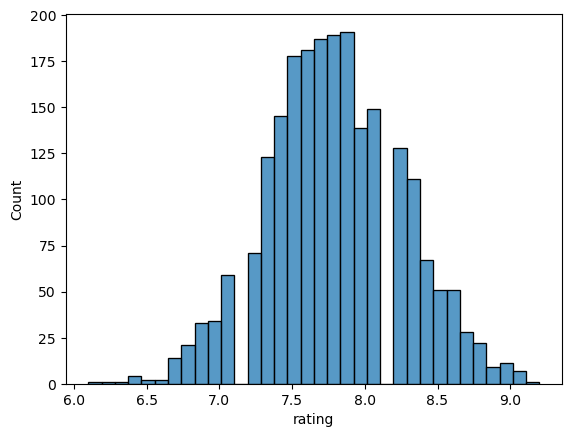

In [45]:
# find out where ratings are generally with plot 
sns.histplot(data= df2['rating'])

In [46]:
df2['target'] = df2['rating']
df2['target'].value_counts()

7.9    191
7.8    189
7.7    187
7.6    181
7.5    178
8.1    149
7.4    145
8.0    139
8.2    128
7.3    123
8.3    111
7.2     71
8.4     67
7.1     59
8.5     51
8.6     51
7.0     34
6.9     33
8.7     28
8.8     22
6.8     21
6.7     14
9.0     11
8.9      9
9.1      7
6.4      4
6.5      2
6.6      2
9.2      1
6.3      1
6.2      1
6.1      1
Name: target, dtype: int64

In [47]:
df2 = df2.drop('rating',axis=1)

# Lets do time since release

In [48]:
date = pd.to_datetime(datetime.now().date())
df2['years since release'] = 2022- df2['aired']
df2

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,num_raters,cast_names,genre_names,tag_names,synopsis,main_genre,target,years since release
0,Tunnel,Drama,South Korea,16,2017,OCN,1.000,32651,"[Nam Ki Hoon, Shin Yong Hwi]",[Lee Eun Mi],14787,"[Choi Jin Hyuk, Yoon Hyun Min, Lee Yoo Young, ...","[Thriller, Mystery]","[ Time Travel, Murder, Criminal Profiler]","In 1986, Park Gwang Ho works as an excellent a...",Thriller,8.7,5
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1.217,16043,[Jung Ji Hyun],[Kwon Do Eun],2119,"[Kim Tae Ri, Nam Joo Hyuk, Bona, Choi Hyun Woo...","[Romance, Life]","[ Athlete, Fencing, 1990s]",The story is set in 1998 and tells the stories...,Romance,8.8,0
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],15880,"[Han Seok Kyu, Ahn Hyo Seop, Lee Sung Kyung, K...","[Romance, Drama]","[ Hospital, Smart Male Lead, Character Develop...","A 혫real doctor혬 story set in a small, humble h...",Romance,8.7,2
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],20399,"[Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, J...","[Life, Drama]","[ Autism, Uncle-Nephew Relationship, Death]",Geu Roo is a young autistic man. He works for ...,Life,9.2,1
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],62174,"[Hyun Bin, Son Ye Jin, Seo Ji Hye, Kim Jung Hy...","[Military, Comedy]","[ North And South Korea, Star Crossed Lovers, ...","After getting into a paragliding accident, Sou...",Military,9.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,Hikonin Sentai Akibaranger,Drama,Japan,13,2012,TV Asahi,0.400,980,"[Tasaki Ryuta, Suzumura Nobuhiro]","[Komura Junko, Arakawa Naruhisa]",353,"[Wada Masato, Ogino Karin, Hinami Kyoko, Takag...","[Tokusatsu, Comedy]","[ Parody, Otaku, Super Sentai]",This unofficial 36.1st installment in the long...,Tokusatsu,7.9,10
3511,Garo: Makai Senki,Drama,Japan,24,2012,TV Tokyo,0.417,727,[Amemiya Keita],"[Kobayashi Yasuko, Era Itaru]",330,"[Fujita Rei, Kageyama Hironobu, Konishi Ryosei...","[Action, Tokusatsu]","[ Superhero, Sword-fight, Nudity]",Garo: Makai Senki is a Japanese tokusatsu tele...,Action,7.9,10
3533,My Ride,Drama,Thailand,10,2022,GMM 25,0.800,7006,[Por Saroch Nuamsamran],"[Fluke Teerapat Lohanan, Tanachot Prapasri]",236,"[Fame Chawinroj Likitchareonsakul, Fluke Pongs...","[Comedy, Romance]","[ Friends To Lovers, Doctor Male Lead, Taxi Dr...","This is the story of Mork and Tawan, a motorcy...",Comedy,7.9,0
3538,Yuru Camp?,Drama,Japan,12,2020,TV Tokyo,0.400,849,"[Ninomiya Takashi, Yoshino Mamoru, Tamazaw...",[Kitagawa Ayako],223,"[Fukuhara Haruka, Ohara Yuno, Tanabe Momoko, Y...","[Adventure, Friendship]","[ Adapted From A Manga, Hobbies, Classmate]",This is the story of a winter day. Kagamihara ...,Adventure,7.9,2


In [49]:
# add to dataframe 
df_years = df2[['Name','years since release']].copy()
print(df_years)

                            Name  years since release
0                         Tunnel                    5
1         Twenty-Five Twenty-One                    0
2                 Dr. Romantic 2                    2
3                 Move to Heaven                    1
4           Crash Landing on You                    2
...                          ...                  ...
3480  Hikonin Sentai Akibaranger                   10
3511           Garo: Makai Senki                   10
3533                     My Ride                    0
3538                  Yuru Camp?                    2
3546                   TWO WEEKS                    3

[2211 rows x 2 columns]


In [50]:
df_years.set_index('Name',inplace=True)

In [51]:
genre_years= pd.merge(df_genres_added, df_years, on=['Name'])
genre_years

,Action,Adventure,Business,Comedy,Crime,Drama,Family,Fantasy,Food,Friendship,...,Romance,School,Sci-Fi,Sports,Supernatural,Thriller,Tokusatsu,Wuxia,Youth,years since release
Name,,,,,,,,,,,,,,,,,,,,,
Tunnel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
Twenty-Five Twenty-One,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Dr. Romantic 2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
Move to Heaven,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Crash Landing on You,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hikonin Sentai Akibaranger,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,10
Garo: Makai Senki,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,10
My Ride,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Adding country 

In [52]:
df_country = pd.Series(df2['country'])
df_country = pd.get_dummies(df_country.apply(pd.Series).stack()).sum(level=0)

# Turns genres into dummy variables
df_country

,China,Hong Kong,Japan,Philippines,South Korea,Taiwan,Thailand
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
3480,0,0,1,0,0,0,0
3511,0,0,1,0,0,0,0
3533,0,0,0,0,0,0,1
3538,0,0,1,0,0,0,0


In [53]:
df_country_added = pd.concat([df2, df_country], axis=1)
df_country_added

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,...,main_genre,target,years since release,China,Hong Kong,Japan,Philippines,South Korea,Taiwan,Thailand
0,Tunnel,Drama,South Korea,16,2017,OCN,1.000,32651,"[Nam Ki Hoon, Shin Yong Hwi]",[Lee Eun Mi],...,Thriller,8.7,5,0,0,0,0,1,0,0
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1.217,16043,[Jung Ji Hyun],[Kwon Do Eun],...,Romance,8.8,0,0,0,0,0,1,0,0
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],...,Romance,8.7,2,0,0,0,0,1,0,0
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],...,Life,9.2,1,0,0,0,0,1,0,0
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],...,Military,9.0,2,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,Hikonin Sentai Akibaranger,Drama,Japan,13,2012,TV Asahi,0.400,980,"[Tasaki Ryuta, Suzumura Nobuhiro]","[Komura Junko, Arakawa Naruhisa]",...,Tokusatsu,7.9,10,0,0,1,0,0,0,0
3511,Garo: Makai Senki,Drama,Japan,24,2012,TV Tokyo,0.417,727,[Amemiya Keita],"[Kobayashi Yasuko, Era Itaru]",...,Action,7.9,10,0,0,1,0,0,0,0
3533,My Ride,Drama,Thailand,10,2022,GMM 25,0.800,7006,[Por Saroch Nuamsamran],"[Fluke Teerapat Lohanan, Tanachot Prapasri]",...,Comedy,7.9,0,0,0,0,0,0,0,1
3538,Yuru Camp?,Drama,Japan,12,2020,TV Tokyo,0.400,849,"[Ninomiya Takashi, Yoshino Mamoru, Tamazaw...",[Kitagawa Ayako],...,Adventure,7.9,2,0,0,1,0,0,0,0


In [54]:
df_country_added.drop(['country'], inplace=True, axis=1)
df_country_added

,Name,category,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,num_raters,...,main_genre,target,years since release,China,Hong Kong,Japan,Philippines,South Korea,Taiwan,Thailand
0,Tunnel,Drama,16,2017,OCN,1.000,32651,"[Nam Ki Hoon, Shin Yong Hwi]",[Lee Eun Mi],14787,...,Thriller,8.7,5,0,0,0,0,1,0,0
1,Twenty-Five Twenty-One,Drama,16,2022,Netflix tvN,1.217,16043,[Jung Ji Hyun],[Kwon Do Eun],2119,...,Romance,8.8,0,0,0,0,0,1,0,0
2,Dr. Romantic 2,Drama,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],15880,...,Romance,8.7,2,0,0,0,0,1,0,0
3,Move to Heaven,Drama,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],20399,...,Life,9.2,1,0,0,0,0,1,0,0
4,Crash Landing on You,Drama,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],62174,...,Military,9.0,2,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,Hikonin Sentai Akibaranger,Drama,13,2012,TV Asahi,0.400,980,"[Tasaki Ryuta, Suzumura Nobuhiro]","[Komura Junko, Arakawa Naruhisa]",353,...,Tokusatsu,7.9,10,0,0,1,0,0,0,0
3511,Garo: Makai Senki,Drama,24,2012,TV Tokyo,0.417,727,[Amemiya Keita],"[Kobayashi Yasuko, Era Itaru]",330,...,Action,7.9,10,0,0,1,0,0,0,0
3533,My Ride,Drama,10,2022,GMM 25,0.800,7006,[Por Saroch Nuamsamran],"[Fluke Teerapat Lohanan, Tanachot Prapasri]",236,...,Comedy,7.9,0,0,0,0,0,0,0,1
3538,Yuru Camp?,Drama,12,2020,TV Tokyo,0.400,849,"[Ninomiya Takashi, Yoshino Mamoru, Tamazaw...",[Kitagawa Ayako],223,...,Adventure,7.9,2,0,0,1,0,0,0,0


In [55]:
# sep country dataframe
df_country = df_country_added[['Name','China', 'Hong Kong', 'Japan', 'Philippines', 'South Korea', 'Taiwan', 'Thailand']].copy()
df_country.set_index('Name',inplace=True)
print(df_country)

                            China  Hong Kong  Japan  Philippines  South Korea  \
Name                                                                            
Tunnel                          0          0      0            0            1   
Twenty-Five Twenty-One          0          0      0            0            1   
Dr. Romantic 2                  0          0      0            0            1   
Move to Heaven                  0          0      0            0            1   
Crash Landing on You            0          0      0            0            1   
...                           ...        ...    ...          ...          ...   
Hikonin Sentai Akibaranger      0          0      1            0            0   
Garo: Makai Senki               0          0      1            0            0   
My Ride                         0          0      0            0            0   
Yuru Camp?                      0          0      1            0            0   
TWO WEEKS                   

In [56]:
genre_years_country= pd.merge(genre_years, df_country, on=['Name'])
genre_years_country

,Action,Adventure,Business,Comedy,Crime,Drama,Family,Fantasy,Food,Friendship,...,Wuxia,Youth,years since release,China,Hong Kong,Japan,Philippines,South Korea,Taiwan,Thailand
Name,,,,,,,,,,,,,,,,,,,,,
Tunnel,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,1,0,0
Twenty-Five Twenty-One,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Dr. Romantic 2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,0,0,1,0,0
Move to Heaven,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
Crash Landing on You,0,0,0,1,0,0,0,0,0,0,...,0,0,2,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hikonin Sentai Akibaranger,0,0,0,1,0,0,0,0,0,0,...,0,0,10,0,0,1,0,0,0,0
Garo: Makai Senki,1,0,0,0,0,0,0,0,0,0,...,0,0,10,0,0,1,0,0,0,0
My Ride,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# trying to add top cast/actors as variable

In [57]:
cast_exploded = dftoprated.explode('cast_names')

In [58]:
stars_50 = cast_exploded['cast_names'].value_counts()[:50].index.tolist()

In [59]:
stars_50

['Lee Joon Hyuk',
 'Kim Ji Won',
 'Jung Kyung Ho',
 'Song Joong Ki',
 'Shin Hye Sun',
 'Yoon Se Ah',
 'Sung Dong Il',
 'Ahn Bo Hyun',
 'Ji Sung',
 'Bae Doo Na',
 'Yoo In Na',
 'Park Seo Joon',
 'Yoo Yeon Seok',
 'Jun Suk Ho',
 'Oh Na Ra',
 'Kim  Sang Ho',
 'Kim Sung Gyu',
 'Lee Se Young',
 'Lee Je Hoon',
 'Lee Jun Ho',
 'Yoo Jae Myung',
 'Nam Joo Hyuk',
 'Byun Yo Han',
 'Park Gyu Young',
 'Oh Jung Se',
 'Kim Soo Hyun',
 'Zhang Xin Cheng',
 'Kim Seo Hyung',
 'Kim Eui Sung',
 'Kim So Yeon',
 'Uhm Ki Joon',
 'Jang Dong Gun',
 'Kim Ok Bin',
 'Lee Jong Suk',
 'Kang Ha Neul',
 'Yang Zi',
 'Bai Lu',
 'Lee Jung Eun',
 'Lee Sung Kyung',
 'Lee Dong Wook',
 'Xu Kai',
 'Dilraba Dilmurat',
 'Yeo Jin Goo',
 'Jung Hae In',
 'Shin Sung Rok',
 'Chun Ho Jin',
 'Nam Gyu Ri',
 'Oh Man Suk',
 'Kim Jung Hyun',
 'Li Ze Feng']

In [60]:
#yeah dont know how to add this...
def top_stars(stars):
    star_list = []
    for star in stars:
        if star in stars_50:
            star_list.append(star)
    return star_list
# Create a function to select top stars and create new columns
# This will let us create dummy variables just for top stars
df2['top stars'] = df2['cast_names'].apply(lambda x: top_stars(x))
#stars_df = pd.get_dummies(df2['top stars'].apply(pd.Series).stack()).sum(level=0)
#stars_df.head()
#genre_years_country_stars = pd.concat([genre_years_country, stars_df[stars_20]], axis=1)
#genre_years_country_stars.replace(np.nan,0,inplace=True)
df2.tail(25)

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,num_raters,cast_names,genre_names,tag_names,synopsis,main_genre,target,years since release,top stars
3280,Line Walker: The Prelude,Drama,Hong Kong,30,2017,TVB Jade,0.750,520,[So Man Chung],[Shuang Cheng],235,"[Michael Miu, Moses Chan, Jessica Hsuan, Benja...","[Action, Crime]",[ ],"In 2010, Cheuk Hoi secretly travels to Bangkok...",Action,8.0,5,[]
3281,Candle in the Tomb: The Lost Caverns,Drama,China,18,2020,Tencent Video,0.583,840,[Fei Zhen Xiang],[Yang Zhe],276,"[Pan Yue Ming, Zhang Yu Qi, Jiang Chao, Wang K...","[Action, Adventure]","[ Explorers, Treasure Hunting, Tomb Raiding]","Hu Ba Yi, Shirley Yang and Wang Pang Zi explor...",Action,8.0,2,[]
3282,Yae no Sakura,Drama,Japan,50,2013,NHK,0.750,1916,"[Ichiki Masae, Sasaki Yoshiharu, Suenaga H...","[Yamamoto Mutsumi, Miura Yuiko, Yoshizawa ...",296,"[Ayase Haruka, Suzuki Rio, Hasegawa Hiroki, Od...","[Historical, Drama]","[ Female Warrior, Sakoku, Clan]",혫Yae no Sakura혬 will tell the story of Niijima...,Historical,8.0,9,[]
3317,Kangoku no Ohimesama,Drama,Japan,10,2017,TBS,0.750,656,"[Kaneko Fuminori, Fukuda Ryosuke]",[Kudo Kankuro],206,"[Koizumi Kyoko, Kanno Miho, Mitsushima Hikari,...","[Friendship, Comedy]","[ Revenge, Female Centered Plot, Ex-convict]","Attempted murder, fraud and embezzlement, illi...",Friendship,8.0,5,[]
3323,DOCTORS 2 Saikyou no Meii,Drama,Japan,9,2013,TV Asahi,0.750,460,"[Inohara Tatsuzo, Motohashi Keita, Kinoshi...",[Fukuda Yasushi],230,"[Sawamura Ikki, Ito Ran, Higa Manami, Ono Take...","[Drama, Medical]",[ ],Surgeon Sagara Kosuke changed the mentalities ...,Drama,8.0,9,[]
3325,Atsu Hime,Drama,Japan,50,2008,NHK,0.750,1104,"[Horikirizono Kentaro, Sato Mineyo, Watana...",[Tabuchi Kumiko],269,"[Miyazaki Aoi, Nagatsuka Kyozo, Higuchi Kanako...","[Historical, Drama]","[ Edo Period, Bakumatsu, Jidaigeki]",The 47th NHK Taiga Drama is a life story of At...,Historical,8.0,14,[]
3330,Super Family,Drama,South Korea,40,2017,SBS,0.583,1207,"[Choi Moon Seok, Lee Kwang Young]",[Jin Young],246,"[Park Hyuk Kwon, Park Sun Young, Kim Ji Min, U...","[Comedy, Romance]","[ Neighbors, Family Relationship, Slice Of Life]","This drama is about a 44-year-old man, Na Chun...",Comedy,8.0,5,[]
3332,Ultraman Geed,Drama,Japan,25,2017,TV Tokyo,0.400,536,"[Sakamoto Koichi, Taguchi Kiyotaka, Ichino...","[Miura Yuiko, Otsuichi]",254,"[Hamada Tatsuomi, Yamamoto Chihiro, Ozawa Yuta...","[Action, Tokusatsu]",[ ],Ultraman Geed is the 29th entry of Ultra Serie...,Action,8.0,5,[]
3347,Tokyo Joshi Zukan,Drama,Japan,11,2017,Amazon Prime,0.367,684,[Tanada Yuki],[Kurosawa Hisako],285,"[Mizukawa Asami, Abe Tsuyoshi, Ueki Shohei, Ma...","[Comedy, Romance]","[ Adapted From Short Story, Hardworking Femal...",The story follows Aya Saito from last year in ...,Comedy,7.9,5,[]
3354,Kodoku no Gurume,Drama,Japan,12,2012,TV Tokyo,0.417,687,[Horai Tadaaki],[Taguchi Yoshihiro],265,"[Matsushige Yutaka, Yamamura Michi, Kinoshita ...","[Food, Life]","[ Adapted From A Manga, Based On True Story ]","Inogashira Goro, a private merchant who person...",Food,7.9,10,[]


In [61]:
df2[df2['top stars'].str.len()!=0]

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,num_raters,cast_names,genre_names,tag_names,synopsis,main_genre,target,years since release,top stars
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1.217,16043,[Jung Ji Hyun],[Kwon Do Eun],2119,"[Kim Tae Ri, Nam Joo Hyuk, Bona, Choi Hyun Woo...","[Romance, Life]","[ Athlete, Fencing, 1990s]",The story is set in 1998 and tells the stories...,Romance,8.8,0,[Nam Joo Hyuk]
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],15880,"[Han Seok Kyu, Ahn Hyo Seop, Lee Sung Kyung, K...","[Romance, Drama]","[ Hospital, Smart Male Lead, Character Develop...","A 혫real doctor혬 story set in a small, humble h...",Romance,8.7,2,[Lee Sung Kyung]
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],20399,"[Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, J...","[Life, Drama]","[ Autism, Uncle-Nephew Relationship, Death]",Geu Roo is a young autistic man. He works for ...,Life,9.2,1,[Lee Je Hoon]
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],62174,"[Hyun Bin, Son Ye Jin, Seo Ji Hye, Kim Jung Hy...","[Military, Comedy]","[ North And South Korea, Star Crossed Lovers, ...","After getting into a paragliding accident, Sou...",Military,9.0,2,[Kim Jung Hyun]
10,Hospital Playlist,Drama,South Korea,12,2020,Netflix tvN,1.500,63124,[Shin Won Ho],[Lee Woo Jung],28729,"[Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Ki...","[Friendship, Romance]","[ Strong Friendship, Multiple Mains, Best Frie...",The stories of people going through their days...,Friendship,9.1,2,"[Yoo Yeon Seok, Jung Kyung Ho]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,How Are You Bread,Drama,South Korea,5,2020,Naver TV Cast Viki,0.700,5891,[Kim Young Joon],[Kang Soo Yeon],1521,"[Suho, Lee Se Young, Moon Ji Yoon, Kim Seo Ra...","[Food, Romance]","[ P창tissier, First Love, Adapted From A Webtoon]","A genius patissier, with talent far beyond his...",Food,6.8,2,[Lee Se Young]
2856,Jungle Fish,Drama,South Korea,1,2008,KBS2,1.000,1395,[Choi Sung Bum],[Seo Jae Won],525,"[Kim Soo Hyun, Park Bo Young, Hwang Chan Sung,...","[School, Drama]","[ School Club, School Problems ]",A drama about school life that sheds light on ...,School,6.8,14,[Kim Soo Hyun]
2857,Marry Him If You Dare,Drama,South Korea,16,2013,KBS2,1.050,14001,"[Yoo Jong Sun, Kwon Gye Hong]",[Hong Jin Ah],6362,"[Yoon Eun Hye, Lee Dong Gun, Jung Yong Hwa, Ha...","[Comedy, Romance]","[ CNBLUE, Second Chance, Time Travel]","Set in the world of television broadcasting, N...",Comedy,6.6,9,[Oh Jung Se]
2862,Triple,Drama,South Korea,16,2009,MBC,1.167,2219,[Lee Yoon Jung],[Lee Jung Ah],907,"[Lee Sun Kyun, Min Hyo Rin, Yoon Kye Sang, Lee...","[Romance, Sports]","[ Innocent Female Lead, Secondary Couple, Wint...","This drama is about a female figure skater, Le...",Romance,6.4,13,[Song Joong Ki]


In [62]:
df2['top_starsnum'] = df2['top stars'].str.len()

In [63]:
df2['top_starsnum'].value_counts()

0    1905
1     230
2      61
3       9
4       5
5       1
Name: top_starsnum, dtype: int64

In [64]:
#change to only 0-1 values?
#df2['top_starsnum']= (df2['top_starsnum'] > 0).astype(int)

In [65]:
#add top_starsnum  to df 
df_topstars = df2[['Name','top_starsnum']].copy()
df_topstars.set_index('Name',inplace=True)

In [66]:
df_topstars

,top_starsnum
Name,
Tunnel,0
Twenty-Five Twenty-One,1
Dr. Romantic 2,1
Move to Heaven,1
Crash Landing on You,1
...,...
Hikonin Sentai Akibaranger,0
Garo: Makai Senki,0
My Ride,0


In [67]:
#genre_years_country
#plus_topstars= pd.merge(genre_years_country, df_topstars, on=['Name'])
#plus_topstars.set_index('Name',inplace=True)

plus_topstars = pd.concat([genre_years_country, df_topstars], axis=1)
plus_topstars

,Action,Adventure,Business,Comedy,Crime,Drama,Family,Fantasy,Food,Friendship,...,Youth,years since release,China,Hong Kong,Japan,Philippines,South Korea,Taiwan,Thailand,top_starsnum
Name,,,,,,,,,,,,,,,,,,,,,
Tunnel,0,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,1,0,0,0
Twenty-Five Twenty-One,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
Dr. Romantic 2,0,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,1,0,0,1
Move to Heaven,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
Crash Landing on You,0,0,0,1,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hikonin Sentai Akibaranger,0,0,0,1,0,0,0,0,0,0,...,0,10,0,0,1,0,0,0,0,0
Garo: Makai Senki,1,0,0,0,0,0,0,0,0,0,...,0,10,0,0,1,0,0,0,0,0
My Ride,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [68]:
plus_topstars['top_starsnum'].value_counts()

0    1905
1     230
2      61
3       9
4       5
5       1
Name: top_starsnum, dtype: int64

# top director

In [69]:
# director time
dir_exploded = dftoprated.explode('director')
dir_20 = dir_exploded['director'].value_counts()[:20].index.tolist()

In [70]:
dir_20

['Kim Won Suk',
 'Shin Won Ho',
 'Chu Yui Bun',
 'Lee Jung Sub',
 'Oh Choong Hwan',
 'Hui Kai Dong',
 'Jo Soo Won',
 'Kong Sheng',
 '  Kim Jung Min',
 'Kim Kyu Tae',
 'Lee Jeong Hyo',
 'Yoo In Shik',
 '  Guo Hao',
 'Kim Hong Seon',
 'Backaof  Noppharnach Chaiwimol',
 'Yoo Je Won',
 'Joo Dong Min',
 'Kim Jin Man',
 'Lee Jae Sang',
 'Kim Jin Min']

In [71]:
#yeah dont know how to add this...
def top_directors(directors):
    dir_list = []
    for director in directors:
        if director in dir_20:
            dir_list.append(director)
    return dir_list
# Create a function to select top stars and create new columns
# This will let us create dummy variables just for top stars
df2['top dir'] = df2['director'].apply(lambda x: top_directors(x))
#stars_df = pd.get_dummies(df2['top stars'].apply(pd.Series).stack()).sum(level=0)
#stars_df.head()
#genre_years_country_stars = pd.concat([genre_years_country, stars_df[stars_20]], axis=1)
#genre_years_country_stars.replace(np.nan,0,inplace=True)
df2.head(25)

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,...,cast_names,genre_names,tag_names,synopsis,main_genre,target,years since release,top stars,top_starsnum,top dir
0,Tunnel,Drama,South Korea,16,2017,OCN,1.000,32651,"[Nam Ki Hoon, Shin Yong Hwi]",[Lee Eun Mi],...,"[Choi Jin Hyuk, Yoon Hyun Min, Lee Yoo Young, ...","[Thriller, Mystery]","[ Time Travel, Murder, Criminal Profiler]","In 1986, Park Gwang Ho works as an excellent a...",Thriller,8.7,5,[],0,[]
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1.217,16043,[Jung Ji Hyun],[Kwon Do Eun],...,"[Kim Tae Ri, Nam Joo Hyuk, Bona, Choi Hyun Woo...","[Romance, Life]","[ Athlete, Fencing, 1990s]",The story is set in 1998 and tells the stories...,Romance,8.8,0,[Nam Joo Hyuk],1,[]
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],...,"[Han Seok Kyu, Ahn Hyo Seop, Lee Sung Kyung, K...","[Romance, Drama]","[ Hospital, Smart Male Lead, Character Develop...","A 혫real doctor혬 story set in a small, humble h...",Romance,8.7,2,[Lee Sung Kyung],1,[Yoo In Shik]
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],...,"[Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, J...","[Life, Drama]","[ Autism, Uncle-Nephew Relationship, Death]",Geu Roo is a young autistic man. He works for ...,Life,9.2,1,[Lee Je Hoon],1,[]
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],...,"[Hyun Bin, Son Ye Jin, Seo Ji Hye, Kim Jung Hy...","[Military, Comedy]","[ North And South Korea, Star Crossed Lovers, ...","After getting into a paragliding accident, Sou...",Military,9.0,2,[Kim Jung Hyun],1,[Lee Jeong Hyo]
5,The King혪s Avatar,Drama,China,40,2019,Tencent Video,0.750,24236,"[Shiyiyue, Zhang Xiao An]","[Qiao Bing Qing, Zhou Miao, Li Zhen]",...,"[Yang Yang, Jiang Shu Ying, Lai Yu Meng, Daisy...","[Action, Friendship]","[ Online Gaming, Strong Friendship, Smart Male...","In the multiplayer online game Glory, Ye Xiu i...",Action,8.6,3,[],0,[]
6,Unnatural,Drama,Japan,10,2018,TBS,0.750,6699,"[Tsukahara Ayuko, Takemura Kentaro, Murao ...",[Nogi Akiko],...,"[Ishihara Satomi, Iura Arata, Kubota Masataka,...","[Mystery, Medical]","[ Forensic, Smart Female Lead, Death]",Unnatural is a case-of-the-week medical myster...,Mystery,8.6,4,[],0,[]
7,Rebel: Thief Who Stole the People,Drama,South Korea,30,2017,MBC,1.000,14364,[Kim Jin Man],[Hwang Jin Young],...,"[Yoon Kyun Sang, Chae Soo Bin, Kim Ji Suk, Lee...","[Action, Thriller]","[ Rebellion, Joseon Dynasty, Strong Male Lead]",혫The culprit who is posing as a royal official...,Action,8.5,5,[],0,[Kim Jin Man]
8,You Are My Hero,Drama,China,40,2021,iQiyi Tencent Video Youku,0.750,17259,[Zhang Tong],[Qin Wen],...,"[Ma Si Chun, Bai Jing Ting, Chen Hao, Jiang Pe...","[Military, Romance]","[ Adapted From A Novel, Male Chases Female Fir...",Freshly graduated doctor Mi Ka was at a jewell...,Military,8.7,1,[],0,[]
9,Love and Redemption,Drama,China,59,2020,Mango TV Tencent Video Youku,0.750,15966,"[Yin Tao, Mai Guan Zhi]",[Liu Fang],...,"[Cheng Yi, Crystal Yuan, Liu Xue Yi, Zhang Yu ...","[Historical, Romance]","[ Reincarnation, Deity, Female Warrior]",A thousand years since the battle between the ...,Historical,8.8,2,[],0,[]


In [72]:
df2[df2['top dir'].str.len()!=0]

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,...,cast_names,genre_names,tag_names,synopsis,main_genre,target,years since release,top stars,top_starsnum,top dir
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],...,"[Han Seok Kyu, Ahn Hyo Seop, Lee Sung Kyung, K...","[Romance, Drama]","[ Hospital, Smart Male Lead, Character Develop...","A 혫real doctor혬 story set in a small, humble h...",Romance,8.7,2,[Lee Sung Kyung],1,[Yoo In Shik]
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],...,"[Hyun Bin, Son Ye Jin, Seo Ji Hye, Kim Jung Hy...","[Military, Comedy]","[ North And South Korea, Star Crossed Lovers, ...","After getting into a paragliding accident, Sou...",Military,9.0,2,[Kim Jung Hyun],1,[Lee Jeong Hyo]
7,Rebel: Thief Who Stole the People,Drama,South Korea,30,2017,MBC,1.000,14364,[Kim Jin Man],[Hwang Jin Young],...,"[Yoon Kyun Sang, Chae Soo Bin, Kim Ji Suk, Lee...","[Action, Thriller]","[ Rebellion, Joseon Dynasty, Strong Male Lead]",혫The culprit who is posing as a royal official...,Action,8.5,5,[],0,[Kim Jin Man]
10,Hospital Playlist,Drama,South Korea,12,2020,Netflix tvN,1.500,63124,[Shin Won Ho],[Lee Woo Jung],...,"[Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Ki...","[Friendship, Romance]","[ Strong Friendship, Multiple Mains, Best Frie...",The stories of people going through their days...,Friendship,9.1,2,"[Yoo Yeon Seok, Jung Kyung Ho]",2,[Shin Won Ho]
14,"Kill Me, Heal Me",Drama,South Korea,20,2015,MBC,1.033,87612,"[Kim Jin Man, Kim Dae Jin]",[Jin Soo Wan],...,"[Ji Sung, Hwang Jung Eum, Park Seo Joon, Kim Y...","[Psychological, Comedy]","[ Dissociative Identity Disorder, Trauma, Boss...",A traumatic childhood experience leaves Cha Do...,Psychological,8.7,7,"[Ji Sung, Park Seo Joon]",2,[Kim Jin Man]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,Invincible Lee Pyung Kang,Drama,South Korea,16,2009,KBS2,1.167,2502,"[Lee Jung Sub, Park Hyun Suk]",[Park Kye Ok],...,"[Ji Hyun Woo, Nam Sang Mi, Seo Do Young, Oh Wo...","[Comedy, Romance]",[ ],"Lee Pyung Kang's father, unfortunately, met wi...",Comedy,7.1,13,[],0,[Lee Jung Sub]
2748,Snow White,Drama,South Korea,16,2004,KBS2,1.083,1872,[Lee Jae Sang],[Lee Sun Young],...,"[Kim Jung Hwa, Yeon Jung Hoon, Lee Wan, Oh Seu...","[Comedy, Romance]","[ Older Woman/Younger Man, Unrequited Love ]",Ma Young Hee has been in love with her best fr...,Comedy,6.9,18,[],0,[Lee Jae Sang]
2776,Glory Jane,Drama,South Korea,24,2011,KBS2,1.100,4268,"[Lee Jung Sub, Lee Eun Jin]",[Kang Eun Kyung],...,"[Chun Jung Myung, Park Min Young, Lee Jang Woo...","[Romance, Drama]","[ Baseball, Sports ]",Yoon Jae In is a struggling young woman who dr...,Romance,7.0,11,[],0,[Lee Jung Sub]
2812,Ohlala Couple,Drama,South Korea,18,2012,KBS2,1.050,2749,"[Lee Jung Sub, Jeon Woo Sung]",[Choi Soon Shik],...,"[Han Chae Ah, Shin Hyun Joon, Kim Jung Eun, Ha...","[Comedy, Romance]","[ Redemption, Second Chance Romance, Infidelity]",Na Yeo Ok is fed up with the infidelity of her...,Comedy,6.7,10,[],0,[Lee Jung Sub]


In [73]:
df2['top_dirnum'] = df2['top dir'].str.len()
df2['top_dirnum'].value_counts()

0    2086
1     120
2       4
3       1
Name: top_dirnum, dtype: int64

In [74]:
#change to only 0-1 values?
df2['top_dirnum']= (df2['top_dirnum'] > 0).astype(int)

In [75]:
#add top_dirnum to df 
df_topdir = df2[['Name','top_dirnum']].copy()
df_topdir.set_index('Name',inplace=True)


In [76]:
#
plus_topdirs = pd.concat([plus_topstars, df_topdir], axis=1)
plus_topdirs

,Action,Adventure,Business,Comedy,Crime,Drama,Family,Fantasy,Food,Friendship,...,years since release,China,Hong Kong,Japan,Philippines,South Korea,Taiwan,Thailand,top_starsnum,top_dirnum
Name,,,,,,,,,,,,,,,,,,,,,
Tunnel,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,1,0,0,0,0
Twenty-Five Twenty-One,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
Dr. Romantic 2,0,0,0,0,0,1,0,0,0,0,...,2,0,0,0,0,1,0,0,1,1
Move to Heaven,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
Crash Landing on You,0,0,0,1,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hikonin Sentai Akibaranger,0,0,0,1,0,0,0,0,0,0,...,10,0,0,1,0,0,0,0,0,0
Garo: Makai Senki,1,0,0,0,0,0,0,0,0,0,...,10,0,0,1,0,0,0,0,0,0
My Ride,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [77]:
plus_topdirs['top_dirnum'].value_counts()

0    2086
1     125
Name: top_dirnum, dtype: int64

# top screenwriter

In [78]:
sw_exploded = dftoprated.explode('screenwriter')
sw_20 = sw_exploded['screenwriter'].value_counts()[:20].index.tolist()

In [79]:
sw_20

['Kim Young Hyun',
 '  Park Sang Yeon',
 'Lee Woo Jung',
 'Kim Eun Hee',
 'Yoo Hyun Mi',
 'Kim Eun Sook',
 'Park Jae Bum',
 'Noh Hee Kyung',
 'Song Jae Jung',
 'Park Hye Ryun',
 'Jang Young Chul',
 '  Jung Kyung Soon',
 'Muto Shogo',
 'Wu Tong',
 '  Zeng Lu',
 'Kim Sae Bom',
 'Joker Sun',
 'Kwon Do Eun',
 'Hong Jung Eun',
 'Kim Soon Ok']

In [80]:
def top_screenwriters(screenwriters):
    sw_list = []
    for screenwriter in screenwriters:
        if screenwriter in sw_20:
            sw_list.append(screenwriter)
    return sw_list
# Create a function to select top stars and create new columns
# This will let us create dummy variables just for top stars
df2['top sw'] = df2['screenwriter'].apply(lambda x: top_screenwriters(x))
#stars_df = pd.get_dummies(df2['top stars'].apply(pd.Series).stack()).sum(level=0)
#stars_df.head()
#genre_years_country_stars = pd.concat([genre_years_country, stars_df[stars_20]], axis=1)
#genre_years_country_stars.replace(np.nan,0,inplace=True)
df2.head(25)

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,...,tag_names,synopsis,main_genre,target,years since release,top stars,top_starsnum,top dir,top_dirnum,top sw
0,Tunnel,Drama,South Korea,16,2017,OCN,1.000,32651,"[Nam Ki Hoon, Shin Yong Hwi]",[Lee Eun Mi],...,"[ Time Travel, Murder, Criminal Profiler]","In 1986, Park Gwang Ho works as an excellent a...",Thriller,8.7,5,[],0,[],0,[]
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1.217,16043,[Jung Ji Hyun],[Kwon Do Eun],...,"[ Athlete, Fencing, 1990s]",The story is set in 1998 and tells the stories...,Romance,8.8,0,[Nam Joo Hyuk],1,[],0,[Kwon Do Eun]
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],...,"[ Hospital, Smart Male Lead, Character Develop...","A 혫real doctor혬 story set in a small, humble h...",Romance,8.7,2,[Lee Sung Kyung],1,[Yoo In Shik],1,[]
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],...,"[ Autism, Uncle-Nephew Relationship, Death]",Geu Roo is a young autistic man. He works for ...,Life,9.2,1,[Lee Je Hoon],1,[],0,[]
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],...,"[ North And South Korea, Star Crossed Lovers, ...","After getting into a paragliding accident, Sou...",Military,9.0,2,[Kim Jung Hyun],1,[Lee Jeong Hyo],1,[]
5,The King혪s Avatar,Drama,China,40,2019,Tencent Video,0.750,24236,"[Shiyiyue, Zhang Xiao An]","[Qiao Bing Qing, Zhou Miao, Li Zhen]",...,"[ Online Gaming, Strong Friendship, Smart Male...","In the multiplayer online game Glory, Ye Xiu i...",Action,8.6,3,[],0,[],0,[]
6,Unnatural,Drama,Japan,10,2018,TBS,0.750,6699,"[Tsukahara Ayuko, Takemura Kentaro, Murao ...",[Nogi Akiko],...,"[ Forensic, Smart Female Lead, Death]",Unnatural is a case-of-the-week medical myster...,Mystery,8.6,4,[],0,[],0,[]
7,Rebel: Thief Who Stole the People,Drama,South Korea,30,2017,MBC,1.000,14364,[Kim Jin Man],[Hwang Jin Young],...,"[ Rebellion, Joseon Dynasty, Strong Male Lead]",혫The culprit who is posing as a royal official...,Action,8.5,5,[],0,[Kim Jin Man],1,[]
8,You Are My Hero,Drama,China,40,2021,iQiyi Tencent Video Youku,0.750,17259,[Zhang Tong],[Qin Wen],...,"[ Adapted From A Novel, Male Chases Female Fir...",Freshly graduated doctor Mi Ka was at a jewell...,Military,8.7,1,[],0,[],0,[]
9,Love and Redemption,Drama,China,59,2020,Mango TV Tencent Video Youku,0.750,15966,"[Yin Tao, Mai Guan Zhi]",[Liu Fang],...,"[ Reincarnation, Deity, Female Warrior]",A thousand years since the battle between the ...,Historical,8.8,2,[],0,[],0,[]


In [81]:
df2[df2['top sw'].str.len()!=0]

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,...,tag_names,synopsis,main_genre,target,years since release,top stars,top_starsnum,top dir,top_dirnum,top sw
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1.217,16043,[Jung Ji Hyun],[Kwon Do Eun],...,"[ Athlete, Fencing, 1990s]",The story is set in 1998 and tells the stories...,Romance,8.8,0,[Nam Joo Hyuk],1,[],0,[Kwon Do Eun]
10,Hospital Playlist,Drama,South Korea,12,2020,Netflix tvN,1.500,63124,[Shin Won Ho],[Lee Woo Jung],...,"[ Strong Friendship, Multiple Mains, Best Frie...",The stories of people going through their days...,Friendship,9.1,2,"[Yoo Yeon Seok, Jung Kyung Ho]",2,[Shin Won Ho],1,[Lee Woo Jung]
13,The Bad Kids,Drama,China,12,2020,iQiyi,0.833,4632,[Bob Xin],"[Joker Sun, Pan Yi Ran]",...,"[ Adapted From A Novel, Web Series, Investigat...",A story that follows three children from a coa...,Adventure,8.6,2,[],0,[],0,[Joker Sun]
18,SKY Castle,Drama,South Korea,20,2019,jTBC,1.250,49510,[Jo Hyun Taek],[Yoo Hyun Mi],...,"[ Multiple Mains, Social Commentary, Sibling]","Han Seo Jin, Noh Seung Hye, Jin Jin Hee, and L...",Mystery,8.9,3,"[Yoon Se Ah, Oh Na Ra, Kim Seo Hyung]",3,[],0,[Yoo Hyun Mi]
21,Kingdom: Season 2,Drama,South Korea,6,2020,Netflix,0.750,28484,"[Kim Sung Hoon, Park In Je]",[Kim Eun Hee],...,"[ Zombies, Corruption, Strong Male Lead]","Following the events in season one, waves of t...",Thriller,8.9,2,"[Bae Doo Na, Kim Sung Gyu, Kim Sang Ho, Jun S...",4,[],0,[Kim Eun Hee]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,Big,Drama,South Korea,16,2012,KBS2,1.083,30702,"[Ji Byung Hyun, Kim Seong Yoon]","[Hong Jung Eun, Hong Mi Ran]",...,"[ Body Swap, Student-Teacher Relationship, Old...",18-year-old Kang Kyung Joon's spirit suddenly ...,Comedy,7.0,10,[],0,[],0,[Hong Jung Eun]
2652,Lovers in Prague,Drama,South Korea,18,2005,SBS,1.083,1226,"[Shin Woo Cheol, Kim Hyung Shik]",[Kim Eun Sook],...,[ Filmed Abroad ],"Jae Hee, a diplomat in Prague, who is getting ...",Comedy,7.1,17,[Yoon Se Ah],1,[],0,[Kim Eun Sook]
2709,Get Karl! Oh Soo Jung,Drama,South Korea,16,2007,SBS,1.167,1626,[Park Hyung Ki],[Park Hye Ryun],...,[ ],Go Man Soo is a world known golf player who wa...,Comedy,6.9,15,[],0,[],0,[Park Hye Ryun]
2762,Celeb to Binbo Taro,Drama,Japan,11,2008,Fuji TV,0.750,1682,"[Matsuda Hidetomo, Ishikawa Junichi, Sato ...","[Muto Shogo, Tokunaga Yuichi, Furuya Kazunao]",...,"[ Single Father, Opposites Attract, Rich Woman...",Wealthy daughter of a hotel chain mogul meets ...,Comedy,6.9,14,[],0,[],0,[Muto Shogo]


In [82]:
df2['top_swnum'] = df2['top sw'].str.len()
df2['top_swnum'].value_counts()

0    2088
1     109
2      14
Name: top_swnum, dtype: int64

In [83]:
#change to only 0-1 values?
df2['top_swnum']= (df2['top_swnum'] > 0).astype(int)

In [84]:
#add top_swnum to df 
df_topsw = df2[['Name','top_swnum']].copy()
df_topsw.set_index('Name',inplace=True)

In [85]:
plus_topsw = pd.concat([plus_topdirs, df_topsw], axis=1)
plus_topsw

,Action,Adventure,Business,Comedy,Crime,Drama,Family,Fantasy,Food,Friendship,...,China,Hong Kong,Japan,Philippines,South Korea,Taiwan,Thailand,top_starsnum,top_dirnum,top_swnum
Name,,,,,,,,,,,,,,,,,,,,,
Tunnel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Twenty-Five Twenty-One,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
Dr. Romantic 2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
Move to Heaven,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
Crash Landing on You,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hikonin Sentai Akibaranger,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Garo: Makai Senki,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
My Ride,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# top tags

In [86]:
tag_exploded = dftoprated.explode('tag_names')
tag_20 = tag_exploded['tag_names'].value_counts()[:20].index.tolist()

In [87]:
tag_20

['Smart Male Lead',
 'Strong Female Lead',
 'Strong Male Lead',
 'Bromance',
 'Power Struggle',
 'Revenge',
 'Murder',
 ' Strong Female Lead',
 'Death',
 'Smart Female Lead',
 'Steamy Kiss',
 'Adapted From A Novel',
 ' Smart Female Lead',
 'Strong Friendship',
 'Nice Male Lead',
 ' Smart Male Lead',
 ' Time Travel',
 'Male Chases Female First',
 ' Power Struggle',
 'Friends To Lovers']

In [88]:
def top_tags(tags):
    tag_list = []
    for tag in tags:
        if tag in tag_20:
            tag_list.append(tag)
    return tag_list
# Create a function to select top stars and create new columns
# This will let us create dummy variables just for top stars
df2['top tags'] = df2['tag_names'].apply(lambda x: top_tags(x))
#stars_df = pd.get_dummies(df2['top stars'].apply(pd.Series).stack()).sum(level=0)
#stars_df.head()
#genre_years_country_stars = pd.concat([genre_years_country, stars_df[stars_20]], axis=1)
#genre_years_country_stars.replace(np.nan,0,inplace=True)
df2.head(25)

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,...,main_genre,target,years since release,top stars,top_starsnum,top dir,top_dirnum,top sw,top_swnum,top tags
0,Tunnel,Drama,South Korea,16,2017,OCN,1.000,32651,"[Nam Ki Hoon, Shin Yong Hwi]",[Lee Eun Mi],...,Thriller,8.7,5,[],0,[],0,[],0,"[ Time Travel, Murder]"
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1.217,16043,[Jung Ji Hyun],[Kwon Do Eun],...,Romance,8.8,0,[Nam Joo Hyuk],1,[],0,[Kwon Do Eun],1,[]
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],...,Romance,8.7,2,[Lee Sung Kyung],1,[Yoo In Shik],1,[],0,[Smart Male Lead]
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],...,Life,9.2,1,[Lee Je Hoon],1,[],0,[],0,[Death]
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],...,Military,9.0,2,[Kim Jung Hyun],1,[Lee Jeong Hyo],1,[],0,[Strong Male Lead]
5,The King혪s Avatar,Drama,China,40,2019,Tencent Video,0.750,24236,"[Shiyiyue, Zhang Xiao An]","[Qiao Bing Qing, Zhou Miao, Li Zhen]",...,Action,8.6,3,[],0,[],0,[],0,"[Strong Friendship, Smart Male Lead]"
6,Unnatural,Drama,Japan,10,2018,TBS,0.750,6699,"[Tsukahara Ayuko, Takemura Kentaro, Murao ...",[Nogi Akiko],...,Mystery,8.6,4,[],0,[],0,[],0,"[Smart Female Lead, Death]"
7,Rebel: Thief Who Stole the People,Drama,South Korea,30,2017,MBC,1.000,14364,[Kim Jin Man],[Hwang Jin Young],...,Action,8.5,5,[],0,[Kim Jin Man],1,[],0,[Strong Male Lead]
8,You Are My Hero,Drama,China,40,2021,iQiyi Tencent Video Youku,0.750,17259,[Zhang Tong],[Qin Wen],...,Military,8.7,1,[],0,[],0,[],0,"[Male Chases Female First, Nice Male Lead]"
9,Love and Redemption,Drama,China,59,2020,Mango TV Tencent Video Youku,0.750,15966,"[Yin Tao, Mai Guan Zhi]",[Liu Fang],...,Historical,8.8,2,[],0,[],0,[],0,[]


In [89]:
df2[df2['top tags'].str.len()!=0]

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,...,main_genre,target,years since release,top stars,top_starsnum,top dir,top_dirnum,top sw,top_swnum,top tags
0,Tunnel,Drama,South Korea,16,2017,OCN,1.000,32651,"[Nam Ki Hoon, Shin Yong Hwi]",[Lee Eun Mi],...,Thriller,8.7,5,[],0,[],0,[],0,"[ Time Travel, Murder]"
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],...,Romance,8.7,2,[Lee Sung Kyung],1,[Yoo In Shik],1,[],0,[Smart Male Lead]
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],...,Life,9.2,1,[Lee Je Hoon],1,[],0,[],0,[Death]
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],...,Military,9.0,2,[Kim Jung Hyun],1,[Lee Jeong Hyo],1,[],0,[Strong Male Lead]
5,The King혪s Avatar,Drama,China,40,2019,Tencent Video,0.750,24236,"[Shiyiyue, Zhang Xiao An]","[Qiao Bing Qing, Zhou Miao, Li Zhen]",...,Action,8.6,3,[],0,[],0,[],0,"[Strong Friendship, Smart Male Lead]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,We Are All Alone,Drama,China,36,2020,iQiyi,0.700,1150,[Wang Zhi],"[Su Peng, Liang Zhen Hua, Qin Wen]",...,Romance,8.0,2,[],0,[],0,[],0,[Strong Female Lead]
3273,Tracer,Drama,South Korea,8,2022,MBC,1.000,3522,[Lee Seung Young],[Kim Hyun Jung],...,Action,8.0,0,[],0,[],0,[],0,[Revenge]
3420,Akira to Akira,Drama,Japan,9,2017,WOWOW,0.833,743,"[Suzuki Kosuke, Mizutani Toshiyuki]",[Maekawa Yoichi],...,Friendship,7.9,5,[],0,[],0,[],0,[Smart Male Lead]
3446,Age of Rebellion,Drama,Taiwan,15,2018,TVBS,1.500,891,[Peter Ho],[Joyce Liu],...,Action,7.9,4,[],0,[],0,[],0,[Strong Male Lead]


In [90]:
df2['top_tagnum'] = df2['top tags'].str.len()
df2['top_tagnum'].value_counts()

0    1640
1     480
2      87
3       4
Name: top_tagnum, dtype: int64

In [91]:
#change to only 0-1 values?
df2['top_tagnum']= (df2['top_tagnum'] > 0).astype(int)

In [92]:
#add top_tagnum to df 
df_toptag = df2[['Name','top_tagnum']].copy()
df_toptag.set_index('Name',inplace=True)

In [93]:
plus_toptag = pd.concat([plus_topsw, df_toptag], axis=1)
plus_toptag

,Action,Adventure,Business,Comedy,Crime,Drama,Family,Fantasy,Food,Friendship,...,Hong Kong,Japan,Philippines,South Korea,Taiwan,Thailand,top_starsnum,top_dirnum,top_swnum,top_tagnum
Name,,,,,,,,,,,,,,,,,,,,,
Tunnel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
Twenty-Five Twenty-One,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
Dr. Romantic 2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
Move to Heaven,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
Crash Landing on You,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hikonin Sentai Akibaranger,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Garo: Makai Senki,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
My Ride,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# add duration to df 

In [94]:
df_duration = df2[['Name','duration']].copy()

In [95]:
plus_duration= pd.merge(plus_toptag, df_duration, on=['Name'])
plus_duration.set_index('Name',inplace=True)

In [96]:
plus_duration

,Action,Adventure,Business,Comedy,Crime,Drama,Family,Fantasy,Food,Friendship,...,Japan,Philippines,South Korea,Taiwan,Thailand,top_starsnum,top_dirnum,top_swnum,top_tagnum,duration
Name,,,,,,,,,,,,,,,,,,,,,
Tunnel,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1.000
Twenty-Five Twenty-One,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1.217
Dr. Romantic 2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,1,1.167
Move to Heaven,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0.867
Crash Landing on You,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,1.417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hikonin Sentai Akibaranger,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.400
Garo: Makai Senki,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.417
My Ride,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.800


# ADD RATINGS AS CATEGORICAL AND LAST 'TARGET' COLUMN

In [97]:
#make a ratings dataframe 
df_ratings = df2[['Name','target']].copy()
print(df_ratings)

                            Name  target
0                         Tunnel     8.7
1         Twenty-Five Twenty-One     8.8
2                 Dr. Romantic 2     8.7
3                 Move to Heaven     9.2
4           Crash Landing on You     9.0
...                          ...     ...
3480  Hikonin Sentai Akibaranger     7.9
3511           Garo: Makai Senki     7.9
3533                     My Ride     7.9
3538                  Yuru Camp?     7.9
3546                   TWO WEEKS     7.9

[2211 rows x 2 columns]


# create model dataframe

In [98]:
prod_model= pd.merge(plus_duration, df_ratings, on=['Name'])
prod_model.set_index('Name',inplace=True)

In [99]:
prod_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2211 entries, Tunnel to TWO WEEKS
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Action               2211 non-null   uint8  
 1   Adventure            2211 non-null   uint8  
 2   Business             2211 non-null   uint8  
 3   Comedy               2211 non-null   uint8  
 4   Crime                2211 non-null   uint8  
 5   Drama                2211 non-null   uint8  
 6   Family               2211 non-null   uint8  
 7   Fantasy              2211 non-null   uint8  
 8   Food                 2211 non-null   uint8  
 9   Friendship           2211 non-null   uint8  
 10  Historical           2211 non-null   uint8  
 11  Horror               2211 non-null   uint8  
 12  Law                  2211 non-null   uint8  
 13  Life                 2211 non-null   uint8  
 14  Mature               2211 non-null   uint8  
 15  Medical              2211 non-nul

In [100]:
prod_model.describe()

,Action,Adventure,Business,Comedy,Crime,Drama,Family,Fantasy,Food,Friendship,...,Philippines,South Korea,Taiwan,Thailand,top_starsnum,top_dirnum,top_swnum,top_tagnum,duration,target
count,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,...,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,0.121212,0.018091,0.071009,0.349163,0.005880,0.130710,0.016282,0.001809,0.025328,0.080959,...,0.003618,0.438263,0.028946,0.078245,0.182723,0.056536,0.055631,0.258254,0.874959,7.788874
std,0.326447,0.133312,0.256897,0.476813,0.076471,0.337159,0.126587,0.042505,0.157155,0.272834,...,0.060057,0.496286,0.167693,0.268618,0.515014,0.231005,0.229259,0.437774,0.287153,0.464858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067000,6.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,7.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.833000,7.800000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.083000,8.100000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,2.250000,9.200000


In [101]:
prod_model.head()

,Action,Adventure,Business,Comedy,Crime,Drama,Family,Fantasy,Food,Friendship,...,Philippines,South Korea,Taiwan,Thailand,top_starsnum,top_dirnum,top_swnum,top_tagnum,duration,target
Name,,,,,,,,,,,,,,,,,,,,,
Tunnel,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1.000,8.7
Twenty-Five Twenty-One,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1.217,8.8
Dr. Romantic 2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,1,1.167,8.7
Move to Heaven,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0.867,9.2
Crash Landing on You,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,1.417,9.0


In [102]:
list(prod_model.columns.values)

['Action',
 'Adventure',
 'Business',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Food',
 'Friendship',
 'Historical',
 'Horror',
 'Law',
 'Life',
 'Mature',
 'Medical',
 'Melodrama',
 'Military',
 'Music',
 'Mystery',
 'Political',
 'Psychological',
 'Romance',
 'School',
 'Sci-Fi',
 'Sports',
 'Supernatural',
 'Thriller',
 'Tokusatsu',
 'Wuxia',
 'Youth',
 'years since release',
 'China',
 'Hong Kong',
 'Japan',
 'Philippines',
 'South Korea',
 'Taiwan',
 'Thailand',
 'top_starsnum',
 'top_dirnum',
 'top_swnum',
 'top_tagnum',
 'duration',
 'target']

In [103]:
prod_model = prod_model[['Action',
 'Adventure',
 'Business',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Food',
 'Friendship',
 'Historical',
 'Horror',
 'Law',
 'Life',
 'Mature',
 'Medical',
 'Melodrama',
 'Military',
 'Music',
 'Mystery',
 'Political',
 'Psychological',
 'Romance',
 'School',
 'Sci-Fi',
 'Sports',
 'Supernatural',
 'Thriller',
 'Tokusatsu',
 'Wuxia',
 'Youth',
 'China',
 'Hong Kong',
 'Japan',
 'Philippines',
 'South Korea',
 'Taiwan',
 'Thailand',
 'top_starsnum',
 'top_dirnum',
 'top_swnum',
'top_tagnum',
'duration',
'years since release',
 'target']]

In [104]:
prod_model.iloc[:,0:44]

,Action,Adventure,Business,Comedy,Crime,Drama,Family,Fantasy,Food,Friendship,...,Philippines,South Korea,Taiwan,Thailand,top_starsnum,top_dirnum,top_swnum,top_tagnum,duration,years since release
Name,,,,,,,,,,,,,,,,,,,,,
Tunnel,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1.000,5
Twenty-Five Twenty-One,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1.217,0
Dr. Romantic 2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,1,1.167,2
Move to Heaven,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0.867,1
Crash Landing on You,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,1.417,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hikonin Sentai Akibaranger,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.400,10
Garo: Makai Senki,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.417,10
My Ride,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.800,0


Scaling the non categorical numerical columns 

In [105]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# normalization with minmax performed better
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
prod_model['duration'] = scaler.fit_transform(prod_model[['duration']])
prod_model['years since release'] = scaler.fit_transform(prod_model[['years since release']])
prod_model['top_starsnum'] = scaler.fit_transform(prod_model[['top_starsnum']])
prod_model['top_dirnum'] = scaler.fit_transform(prod_model[['top_dirnum']])
#prod_model['top_swnum'] = scaler.fit_transform(prod_model[['top_swnum']])
#prod_model['top_tagnum'] = scaler.fit_transform(prod_model[['top_tagnum']])
prod_model

,Action,Adventure,Business,Comedy,Crime,Drama,Family,Fantasy,Food,Friendship,...,South Korea,Taiwan,Thailand,top_starsnum,top_dirnum,top_swnum,top_tagnum,duration,years since release,target
Name,,,,,,,,,,,,,,,,,,,,,
Tunnel,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0.0,0.0,0,1,0.427393,0.227273,8.7
Twenty-Five Twenty-One,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0.2,0.0,1,0,0.526798,0.000000,8.8
Dr. Romantic 2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0.2,1.0,0,1,0.503894,0.090909,8.7
Move to Heaven,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0.2,0.0,0,1,0.366468,0.045455,9.2
Crash Landing on You,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0.2,1.0,0,1,0.618415,0.090909,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hikonin Sentai Akibaranger,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0,0,0.152542,0.454545,7.9
Garo: Makai Senki,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0,0,0.160330,0.454545,7.9
My Ride,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0.0,0.0,0,0,0.335776,0.000000,7.9


In [106]:
#Dropping unimportant columns
prod_model = prod_model.drop(['Crime', 'Taiwan', 'Family', 'Hong Kong', 'Supernatural', 'Political', 'Melodrama', 'Mature', 'Law', 'Horror', 'Action'], axis=1)
prod_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2211 entries, Tunnel to TWO WEEKS
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Adventure            2211 non-null   uint8  
 1   Business             2211 non-null   uint8  
 2   Comedy               2211 non-null   uint8  
 3   Drama                2211 non-null   uint8  
 4   Fantasy              2211 non-null   uint8  
 5   Food                 2211 non-null   uint8  
 6   Friendship           2211 non-null   uint8  
 7   Historical           2211 non-null   uint8  
 8   Life                 2211 non-null   uint8  
 9   Medical              2211 non-null   uint8  
 10  Military             2211 non-null   uint8  
 11  Music                2211 non-null   uint8  
 12  Mystery              2211 non-null   uint8  
 13  Psychological        2211 non-null   uint8  
 14  Romance              2211 non-null   uint8  
 15  School               2211 non-nul

In [107]:
features = list(prod_model.columns.values)

# Train test split - may need to make rating into classes to use decision tree/gradient ... as these cant be used for continuous data 

In [108]:
X, y = prod_model.iloc[:,0:33], prod_model['target']
cols = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)

In [109]:
lm = LinearRegression()
lasso  = LassoCV(n_alphas=200)
ridge  = RidgeCV(alphas=np.linspace(.1, 10, 100))
dtree = DecisionTreeRegressor(criterion= 'mse', max_depth= 2, 
                              max_leaf_nodes= 20, min_samples_leaf= 100,
                              min_samples_split= 40)
rf = RandomForestRegressor(n_estimators= 300, min_samples_split=15,
                           min_samples_leaf= 1, max_features= 'sqrt',
                           max_depth= 15)
GD = GradientBoostingRegressor(max_depth = 3, n_estimators= 50)
#Support Vector Regression.
sv = svm.SVR()

In [110]:
lm.fit(X_train, y_train)
lmpred = lm.predict(X_test)
lmMAE= metrics.mean_absolute_error(y_test, lmpred)
lmMSE= metrics.mean_squared_error(y_test, lmpred)
lmRMSE= np.sqrt(metrics.mean_squared_error(y_test, lmpred))
lmscores= {"Linear Regression" : [lmMAE,lmMSE,lmRMSE]}
lmscores = pd.DataFrame(lmscores, index=['MAE','MSE','RMSE'])
lmscores

,Linear Regression
MAE,0.298353
MSE,0.134997
RMSE,0.367419


[Text(0.5, 1.0, 'Linear Regression (ytest - predicted)')]

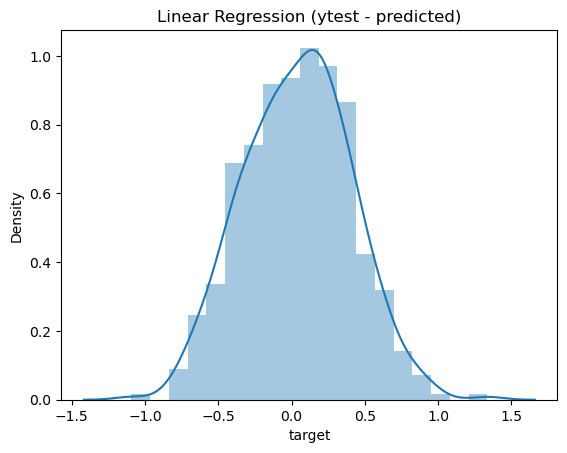

In [111]:
sns.distplot(y_test-lmpred).set(title= "Linear Regression (ytest - predicted)")

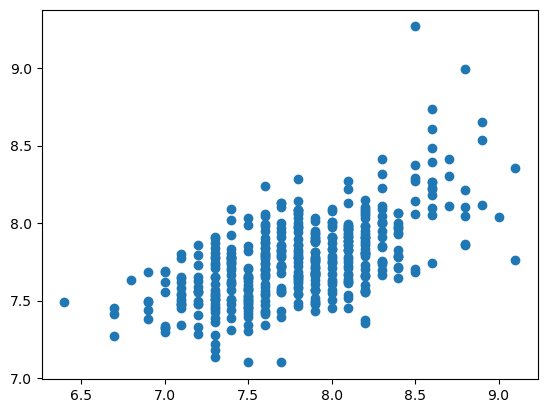

In [112]:
plt.scatter(y_test,lmpred)

In [113]:
#decision tree best params select

In [114]:
tree_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

In [115]:
dtree = GridSearchCV(dtree, tree_grid, cv=5)

In [116]:
dtree.fit(X,y)


ValueError: 
All the 810 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kelli\anaconda3\envs\bus_analytics\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kelli\anaconda3\envs\bus_analytics\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\kelli\anaconda3\envs\bus_analytics\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\kelli\anaconda3\envs\bus_analytics\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'poisson', 'friedman_mse', 'absolute_error', 'squared_error'}. Got 'mse' instead.

--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kelli\anaconda3\envs\bus_analytics\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kelli\anaconda3\envs\bus_analytics\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\kelli\anaconda3\envs\bus_analytics\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\kelli\anaconda3\envs\bus_analytics\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'poisson', 'friedman_mse', 'absolute_error', 'squared_error'}. Got 'mae' instead.


In [ ]:
dtree.best_params_

In [ ]:
dtree.best_score_

In [ ]:
treepredictions=dtree.predict(X_test)

In [ ]:
sns.distplot(y_test-treepredictions).set(title= "Decision Tree (ytest - predicted)")

In [ ]:
treeMAE= metrics.mean_absolute_error(y_test, treepredictions)
treeMSE= metrics.mean_squared_error(y_test, treepredictions)
treeRMSE= np.sqrt(metrics.mean_squared_error(y_test, treepredictions))
treescores= {"Decision Tree" : [treeMAE,treeMSE,treeRMSE]}
treescores = pd.DataFrame(treescores, index=['MAE','MSE','RMSE'])
treescores

In [ ]:
#random forest best params select

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

In [ ]:
rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
rf.best_params_

In [ ]:
rf.best_score_

In [ ]:
rfpredictions=rf.predict(X_test)

In [ ]:
sns.distplot(y_test-rfpredictions).set(title= "Random Forest (ytest - predicted)")

In [ ]:
plt.scatter(y_test,rfpredictions)

In [ ]:
rfMAE= metrics.mean_absolute_error(y_test, rfpredictions)
rfMSE= metrics.mean_squared_error(y_test, rfpredictions)
rfRMSE= np.sqrt(metrics.mean_squared_error(y_test, rfpredictions))
rfscores= {"Random Forest" : [rfMAE,rfMSE,rfRMSE]}
rfscores = pd.DataFrame(rfscores, index=['MAE','MSE','RMSE'])
rfscores

In [ ]:
#Gradient booster
GD.fit(X_train, y_train)
GDpred = GD.predict(X_test)

GDMAE= metrics.mean_absolute_error(y_test, GDpred)
GDMSE= metrics.mean_squared_error(y_test, GDpred)
GDRMSE= np.sqrt(metrics.mean_squared_error(y_test, GDpred))
GDscores= {"Gradient Boosting" : [GDMAE,GDMSE,GDRMSE]}
GDscores = pd.DataFrame(GDscores, index=['MAE','MSE','RMSE'])
GDscores

In [ ]:
sns.distplot(y_test - GDpred).set(title= "Gradient Boost (ytest - predicted)")

In [ ]:
sv.fit(X_train, y_train)
svpred = sv.predict(X_test)
svMAE= metrics.mean_absolute_error(y_test, svpred)
svMSE= metrics.mean_squared_error(y_test, svpred)
svRMSE= np.sqrt(metrics.mean_squared_error(y_test, svpred))
svscores= {"Support Vector" : [svMAE,svMSE,svRMSE]}
svscores = pd.DataFrame(svscores, index=['MAE','MSE','RMSE'])
svscores

In [ ]:
sns.distplot(y_test - svpred).set(title= "Support Vector (ytest - predicted)")

In [ ]:
lasso.fit(X_train, y_train)
lassopred = lasso.predict(X_test)
lassoMAE= metrics.mean_absolute_error(y_test, lassopred)
lassoMSE= metrics.mean_squared_error(y_test, lassopred)
lassoRMSE= np.sqrt(metrics.mean_squared_error(y_test, lassopred))
lassoscores= {"Lasso" : [lassoMAE,lassoMSE,lassoRMSE]}
lassoscores = pd.DataFrame(lassoscores, index=['MAE','MSE','RMSE'])
lassoscores

In [ ]:
sns.distplot(y_test - lassopred).set(title= "Lasso (ytest - predicted)")

In [ ]:
ridge = ridge.fit(X_train, y_train)
ridgepred = ridge.predict(X_test)
ridgeMAE= metrics.mean_absolute_error(y_test, ridgepred)
ridgeMSE= metrics.mean_squared_error(y_test, ridgepred)
ridgeRMSE= np.sqrt(metrics.mean_squared_error(y_test, ridgepred))
ridgescores= {"Ridge" : [ridgeMAE,ridgeMSE,ridgeRMSE]}
ridgescores = pd.DataFrame(ridgescores, index=['MAE','MSE','RMSE'])
ridgescores

In [ ]:
ridge.score(X_train, y_train)

In [ ]:
sns.distplot(y_test - ridgepred).set(title= "Ridge (ytest - predicted)")

In [ ]:
# lets do some bar graphs showing the scores compared 

In [ ]:
scoredfs = [lmscores,ridgescores,lassoscores, rfscores, GDscores, svscores]
scoredfs
allscores = pd.concat(scoredfs, axis=1)
allscores

In [ ]:
#do we want to try out neural networks ?? 

In [ ]:
# Dataframe of importances 
GD.fit(X_train, y_train)
data = list(zip(prod_model.columns[0:33], GD.feature_importances_))
eval_df1 = pd.DataFrame(data, columns =['Feature', 'Importances'])
eval_df1 = eval_df1.sort_values(by='Importances', ascending=False)
eval_df1

In [ ]:
ax1 = eval_df1.plot(x = 'Feature',y ='Importances',kind='bar', figsize=(20,10), fontsize=13)
plt.title('Feature Importances', fontsize=15)
ax1.set_xlabel('Features', fontsize=13)
ax1.set_ylabel('Importance Scores by sklearn', fontsize=13)
plt.show()

In [ ]:
# The `lm` object contains our model's coefficients
lmcoefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
lmcoefficients.columns = ['Features','coef']
lmcoefficients = lmcoefficients.sort_values(by= 'coef', ascending=False)
lmcoefficients = lmcoefficients.set_index(lmcoefficients.columns[0])
lmcoefficients